In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.__version__

'1.19.2'

In [2]:
# step function
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [4]:
def step_function_safe(x):
    y = x > 0
    return y.astype(np.int)

In [5]:
x = np.array([1, 2])
step_function_safe(x)

array([1, 1])

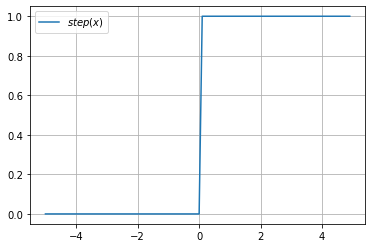

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function_safe(x)
plt.plot(x, y, label='$step(x)$')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
x = np.array([-1.0, 0.0, 1.0])
sigmoid(x)

array([0.26894142, 0.5       , 0.73105858])

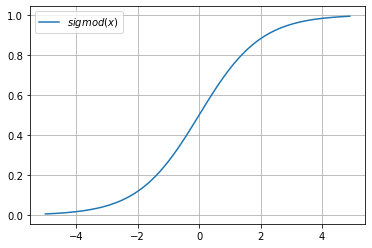

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y, label='$sigmod(x)$')
plt.legend()
plt.grid(True)
plt.show()

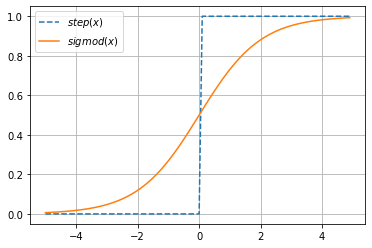

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, step_function_safe(x), '--', label='$step(x)$')
plt.plot(x, sigmoid(x), label='$sigmod(x)$')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
def relu(x):
    return np.maximum(0, x)

In [14]:
x = np.array([-1.0, 0.0, 1.0])
relu(x)

array([0., 0., 1.])

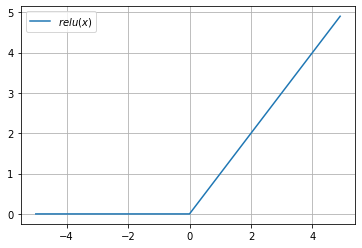

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y, label='$relu(x)$')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
X = np.array([1.0, 0.5])
W = np.array([
    [0.1, 0.3, 0.5],
    [0.2, 0.4, 0.6]
])
B = np.array([0.1, 0.2, 0.3])
A = X @ W + B
Y = sigmoid(A)
A, Y

(array([0.3, 0.7, 1.1]), array([0.57444252, 0.66818777, 0.75026011]))

In [19]:
def identity_function(x):
    return x

In [20]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = x @ W1 + b1
    z1 = sigmoid(a1)
    a2 = z1 @ W2 + b2
    z2 = sigmoid(a2)
    a3 = z2 @ W3 + b3
    y = identity_function(a3)
    return y

In [21]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

In [22]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
sum_exp_a = np.sum(exp_a)
exp_a, sum_exp_a

(array([ 1.34985881, 18.17414537, 54.59815003]), 74.1221542101633)

In [23]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [25]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    return exp_a / sum_exp_a

In [27]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
y

array([0.01821127, 0.24519181, 0.73659691])

In [52]:
from sklearn.datasets import load_digits

(X_train, y_train) = load_digits(return_X_y=True)

In [53]:
X_train.shape, y_train.shape, X_train[0].shape

((1797, 64), (1797,), (64,))

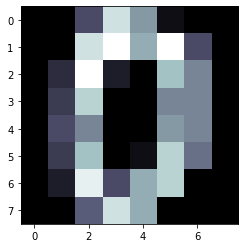

In [54]:
plt.imshow(X_train[0].reshape(8, 8), cmap=plt.cm.bone)
plt.show()